# AED sur le dataset des expeditions

Dans cette section, nous allons effectuer une analyse exploratoire des données (AED) sur le dataset `epxeditions`. Cette analyse nous permettra de mieux comprendre la structure des données, de détecter les valeurs manquantes, de visualiser les distributions des variables et d'identifier les relations potentielles entre les variables.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('../RAW_data/expeditionsV2.csv', sep=";")
data.head()

,id_expedition,id_commande,id_produit,quantité,entrepôt,date_expedition,date_livraison,transporteur,coût_transport,délai_livraison
0,SHP000001,O000001,P00413,2,Marseille,2024-09-09,2024-09-15,UPS,11.62,6
1,SHP000002,O000002,P00778,15,Lyon,2024-11-16,2024-11-23,Chronopost,13.61,7
2,SHP000003,O000004,P00535,8,Lyon,2024-11-06,2024-11-09,FedEx,19.32,3
3,SHP000004,O000006,P00898,3,Paris,2024-01-26,2024-01-28,DHL,14.79,2
4,SHP000005,O000007,P00445,1,Lyon,2024-02-18,2024-02-21,FedEx,13.56,3


In [37]:
data.shape

(42404, 10)

In [38]:
data.describe()

,quantité,coût_transport,délai_livraison
count,42404.000000,42404.000000,42404.000000
mean,4.788817,14.646190,3.723540
std,4.462332,3.486165,1.457153
min,1.000000,6.000000,2.000000
25%,2.000000,12.220000,2.750000
50%,3.000000,14.400000,4.000000
75%,8.000000,17.090000,4.000000
max,20.000000,22.000000,7.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42404 entries, 0 to 42403
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_expedition    42404 non-null  object 
 1   id_commande      42404 non-null  object 
 2   id_produit       42404 non-null  object 
 3   quantité         42404 non-null  int64  
 4   entrepôt         42404 non-null  object 
 5   date_expedition  42404 non-null  object 
 6   date_livraison   42404 non-null  object 
 7   transporteur     42404 non-null  object 
 8   coût_transport   42404 non-null  float64
 9   délai_livraison  42404 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.2+ MB


In [40]:
data.isnull().sum()

id_expedition      0
id_commande        0
id_produit         0
quantité           0
entrepôt           0
date_expedition    0
date_livraison     0
transporteur       0
coût_transport     0
délai_livraison    0
dtype: int64

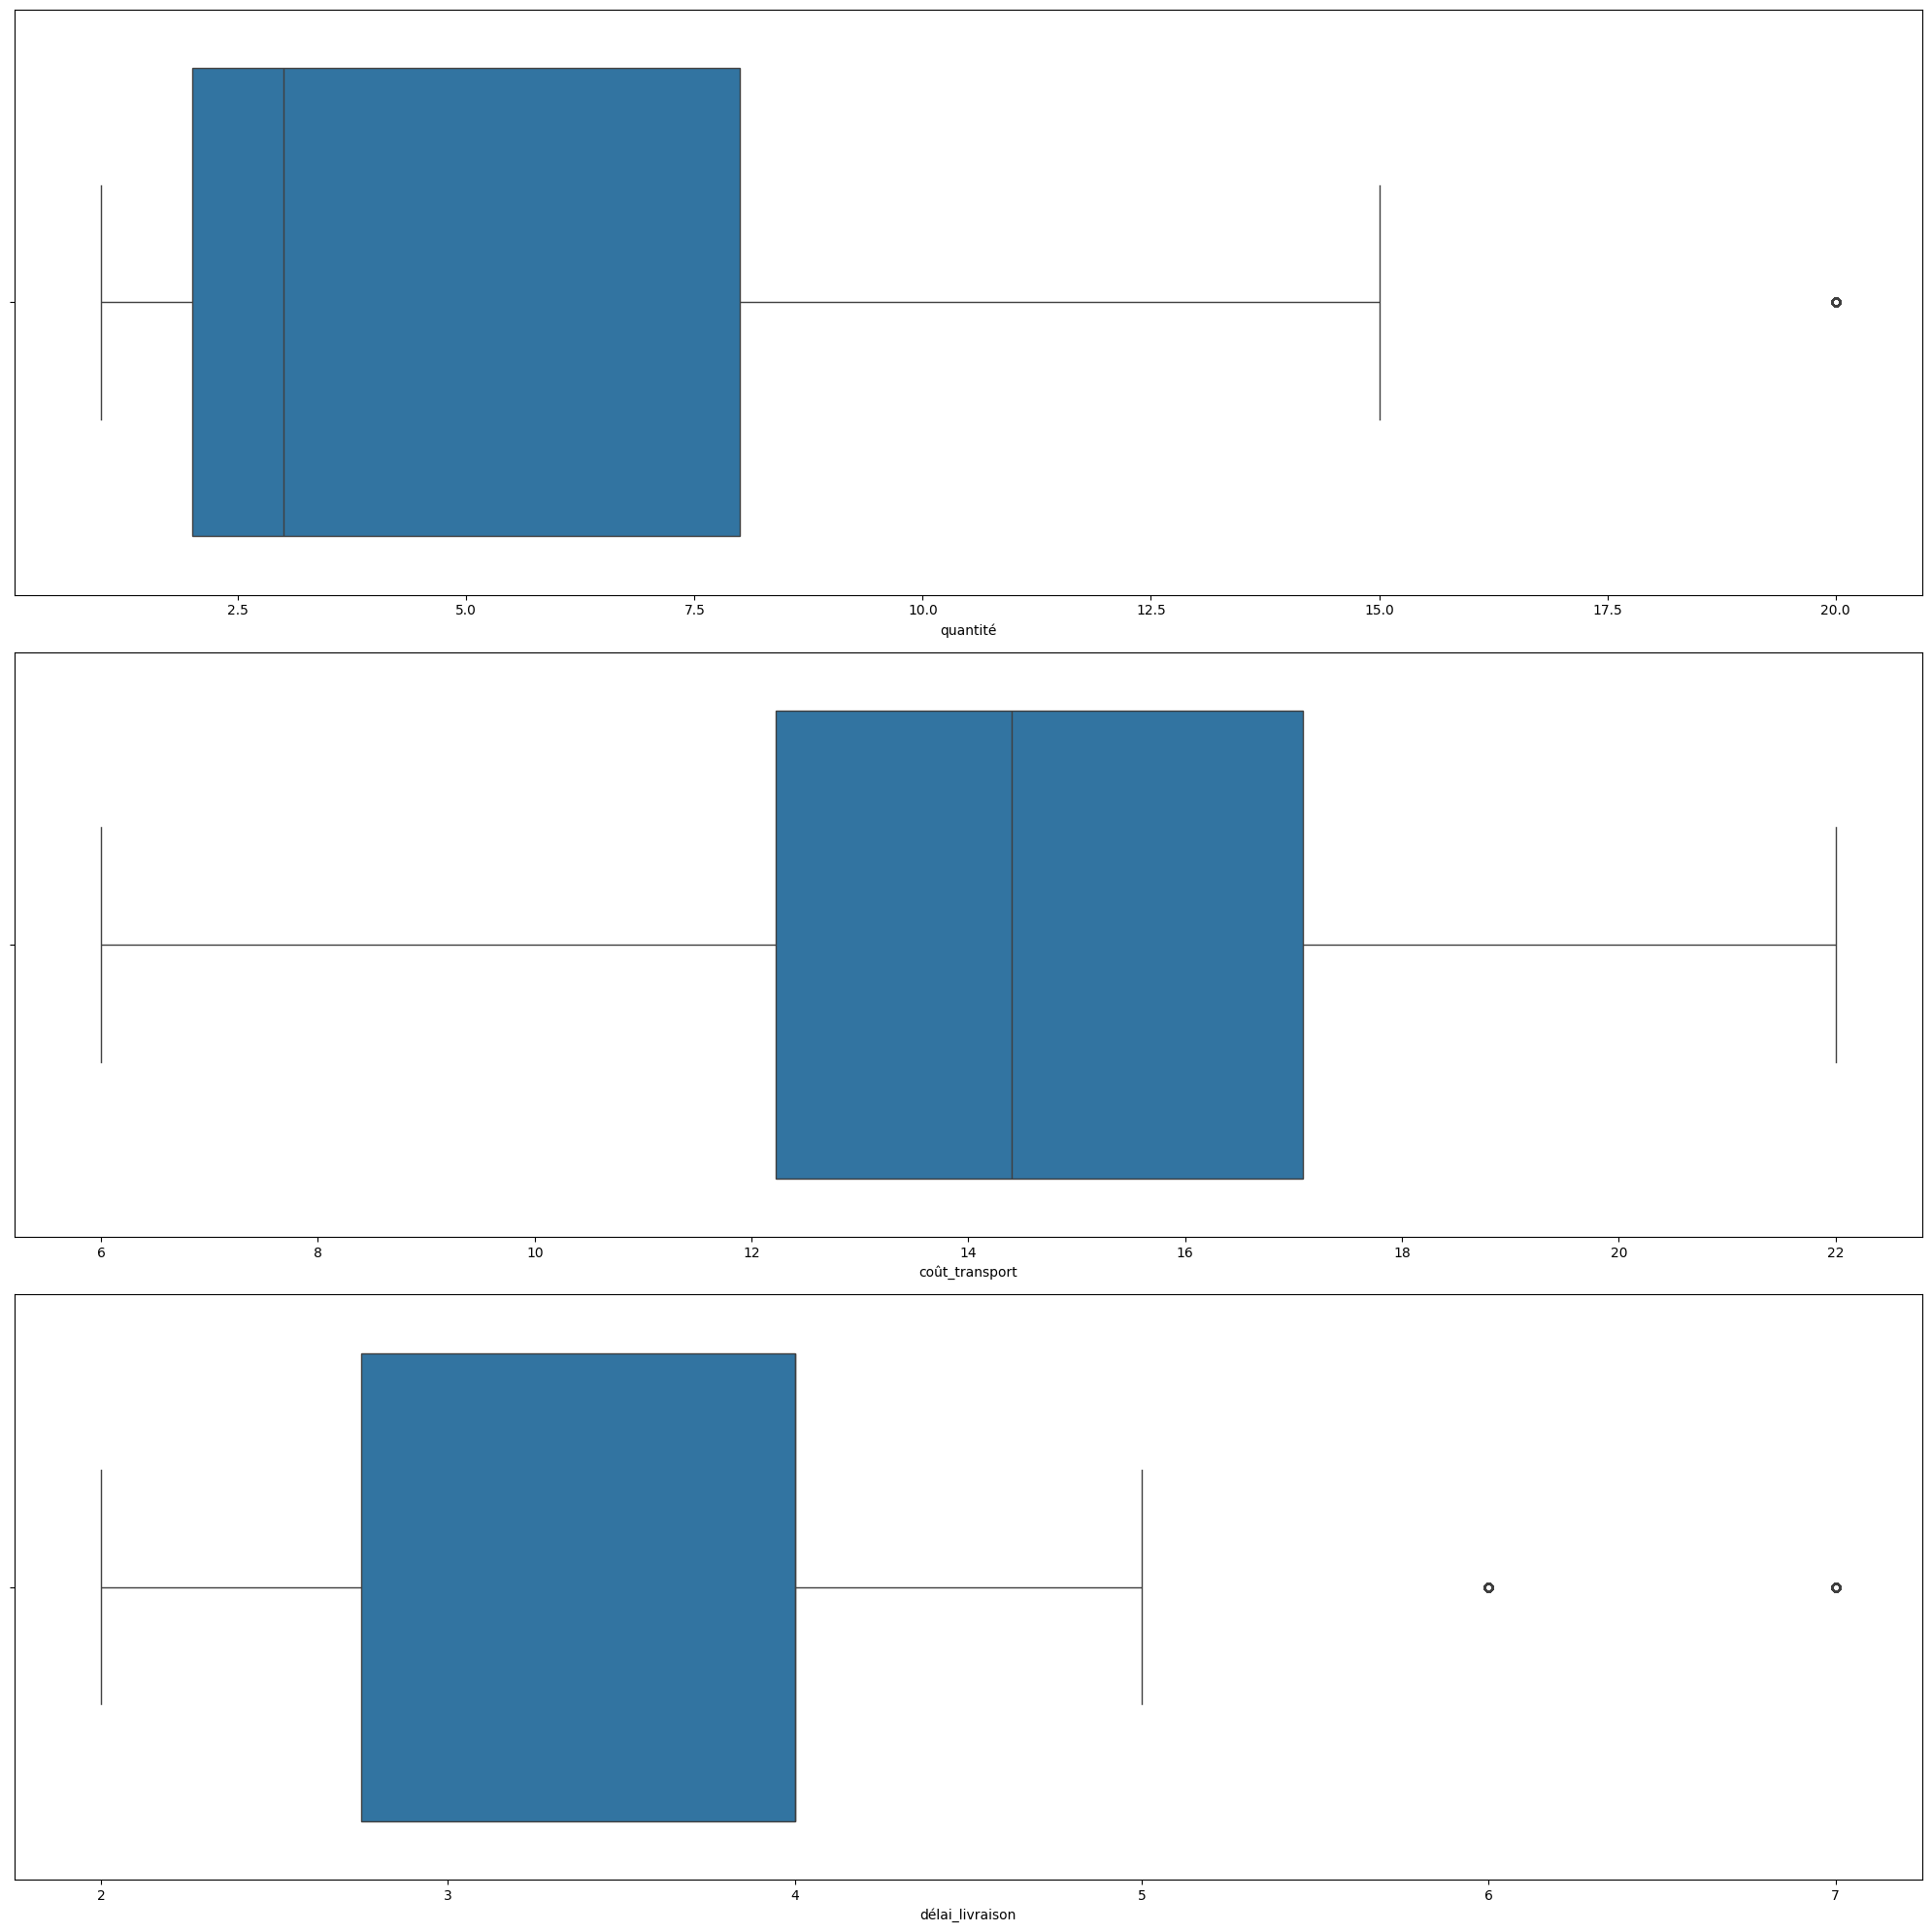

In [41]:
#on vient vérifier avec des boxplot si il y a des outliers (valeurs aberrantes)
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(x=data['quantité'])
plt.subplot(3,1,2)
sns.boxplot(x=data['coût_transport'])
plt.subplot(3,1,3)
sns.boxplot(x=data['délai_livraison'])
plt.tight_layout()
plt.show()

Des outliers sont présent dans la collone des quantités et délais de livraisons mais ils ne sont pas abbérants. Ils sont donc conservés.

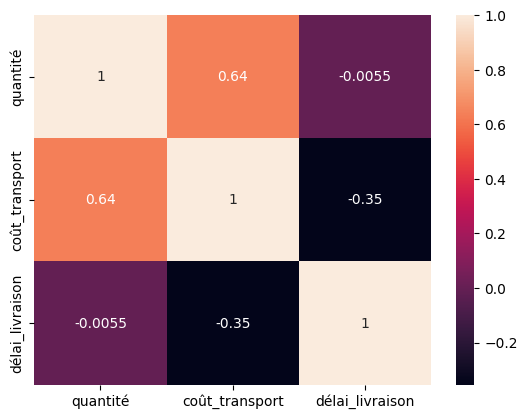

In [42]:
data_corr = data[['quantité', 'coût_transport', 'délai_livraison']]
corr = data_corr.corr()
sns.heatmap(corr, annot=True)
plt.show()

On constate qu'il y a une très légère corrélation entre la quantité et le coût de transport.

In [43]:
print("quantité min", data['quantité'].min())
print("quantité max",data['quantité'].max())
print("coût_transport min", data['coût_transport'].min())
print("coût_transport max", data['coût_transport'].max())
print("délai livraison min",data['délai_livraison'].min())
print("délai livraison max", data['délai_livraison'].max())


quantité min 1
quantité max 20
coût_transport min 6.0
coût_transport max 22.0
délai livraison min 2
délai livraison max 7


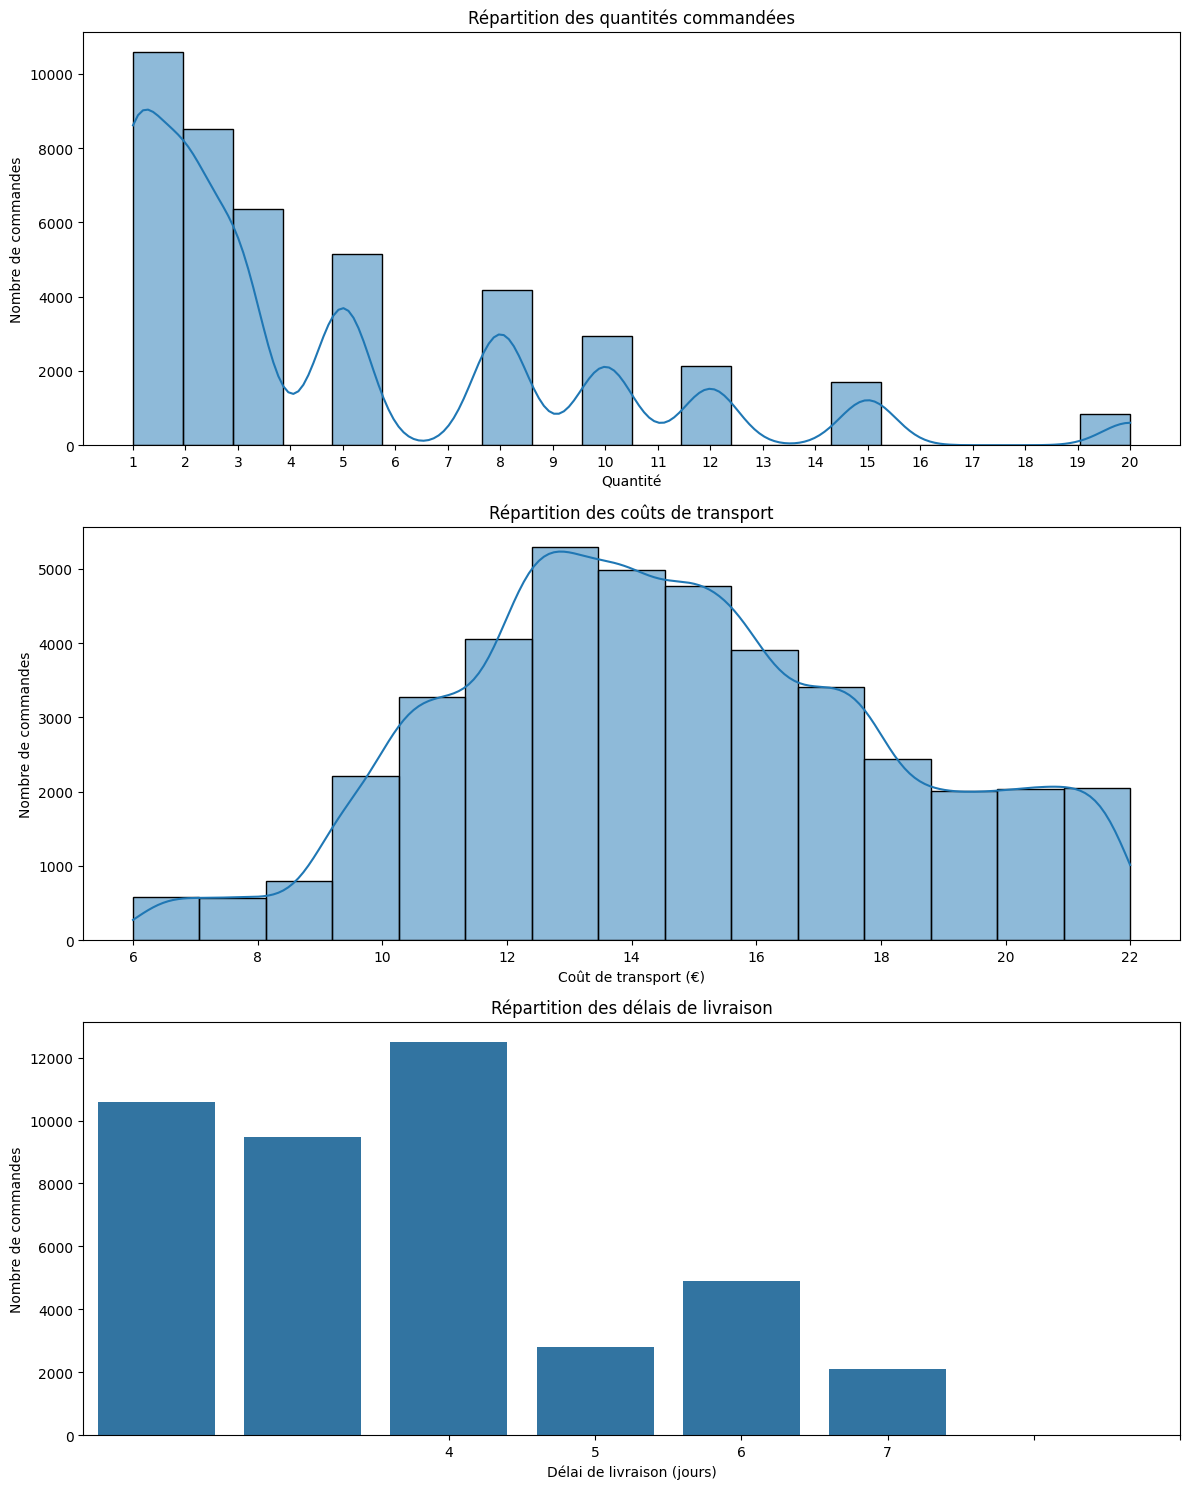

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.histplot(data=data, x='quantité', kde=True, ax=axes[0], bins=20)
axes[0].set_title('Répartition des quantités commandées')
axes[0].set_xlabel('Quantité')
axes[0].set_ylabel('Nombre de commandes')
axes[0].set_xticks(range(1, 21))

sns.histplot(data=data, x='coût_transport', kde=True, ax=axes[1], bins=15)
axes[1].set_title('Répartition des coûts de transport')
axes[1].set_xlabel('Coût de transport (€)')
axes[1].set_ylabel('Nombre de commandes')

delivery_counts = data['délai_livraison'].value_counts().sort_index()
sns.barplot(x=delivery_counts.index, y=delivery_counts.values, ax=axes[2])
axes[2].set_title('Répartition des délais de livraison')
axes[2].set_xlabel('Délai de livraison (jours)')
axes[2].set_ylabel('Nombre de commandes')
axes[2].set_xticks(range(2, 8))

plt.tight_layout()
plt.show()

Les répartitions semblent être normal et donc exploitables.

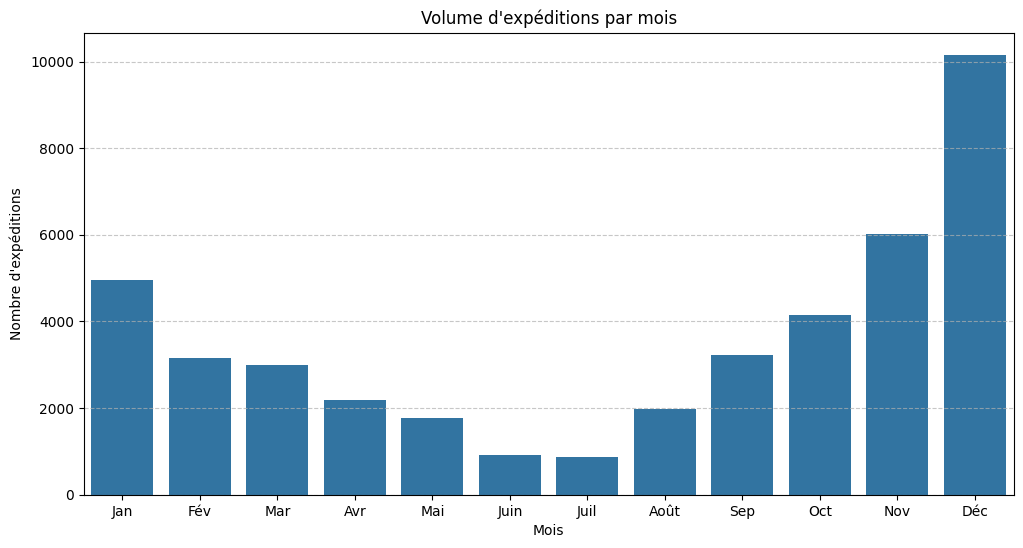

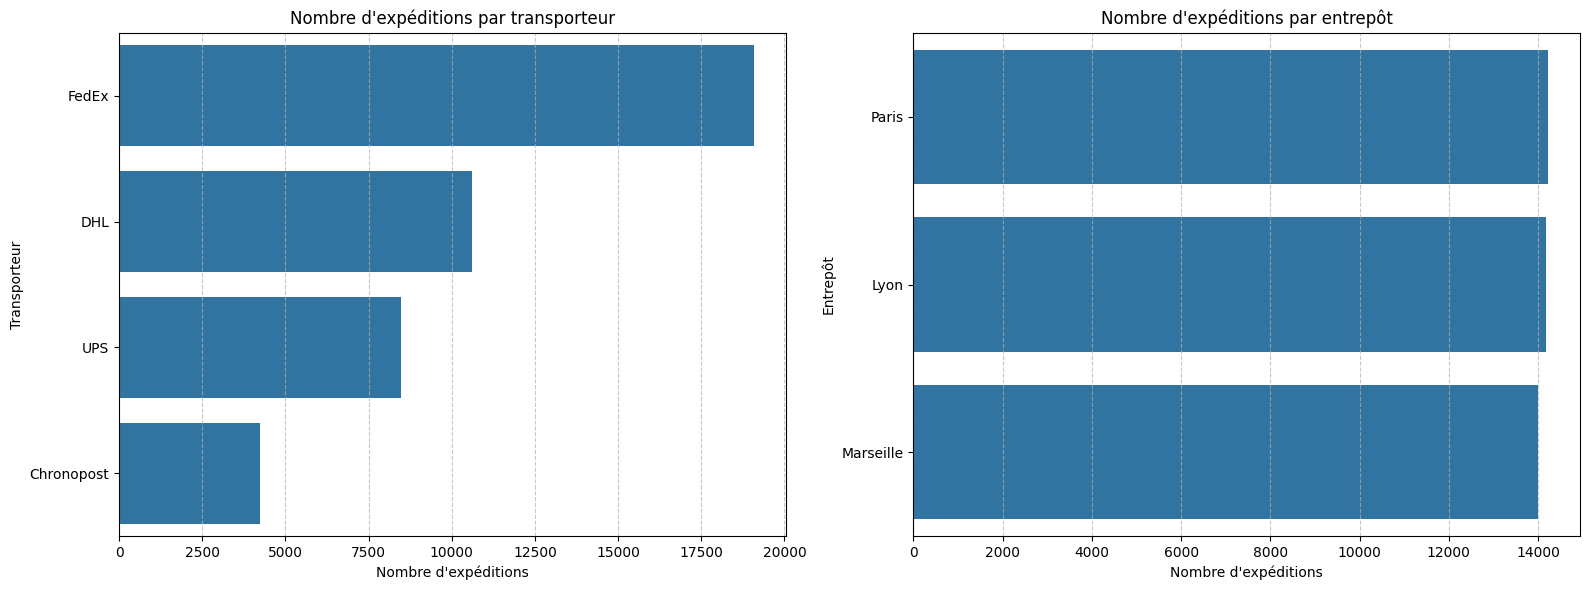

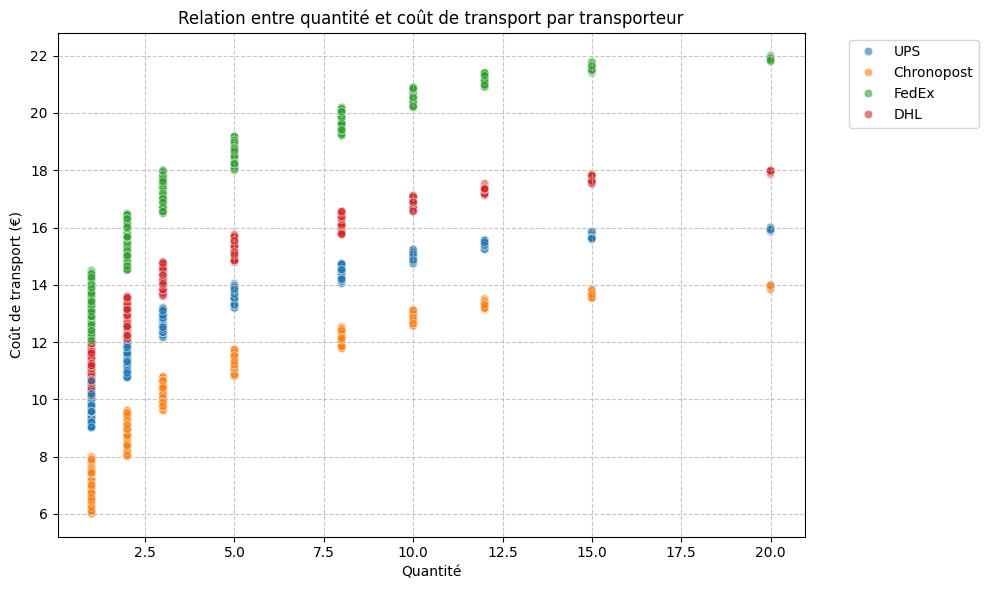

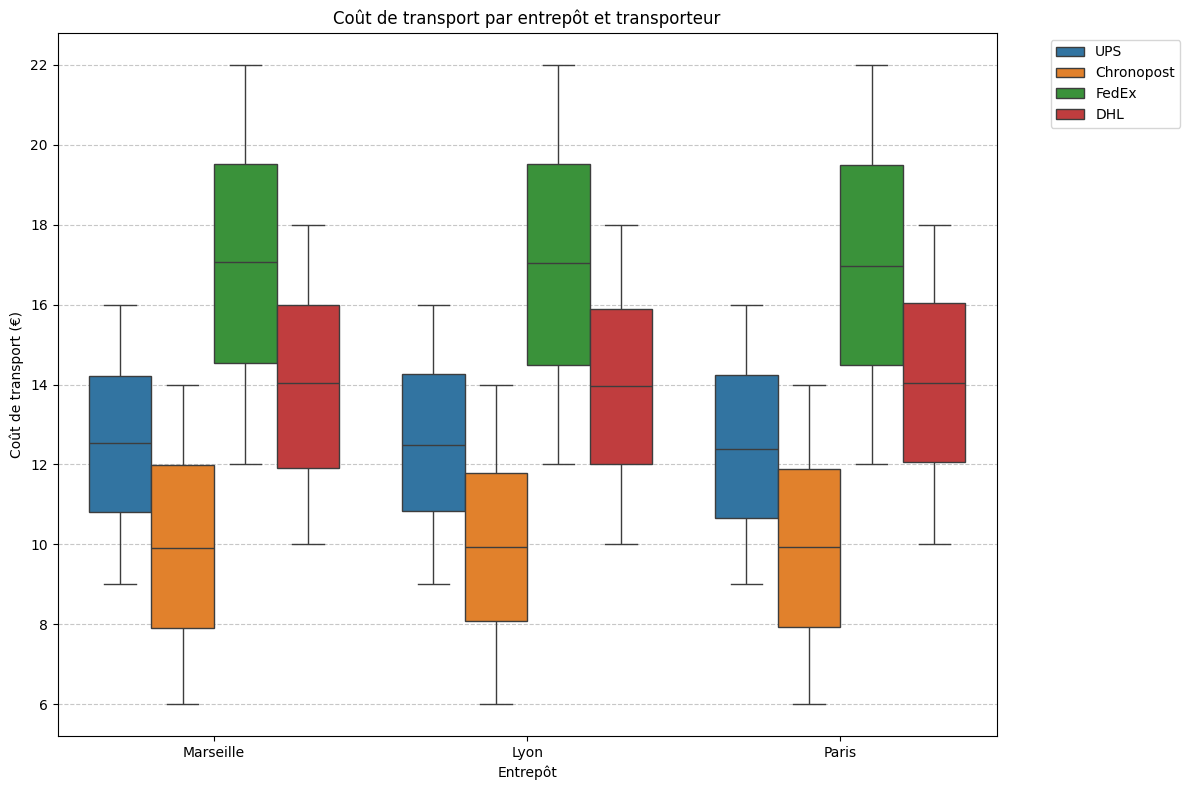

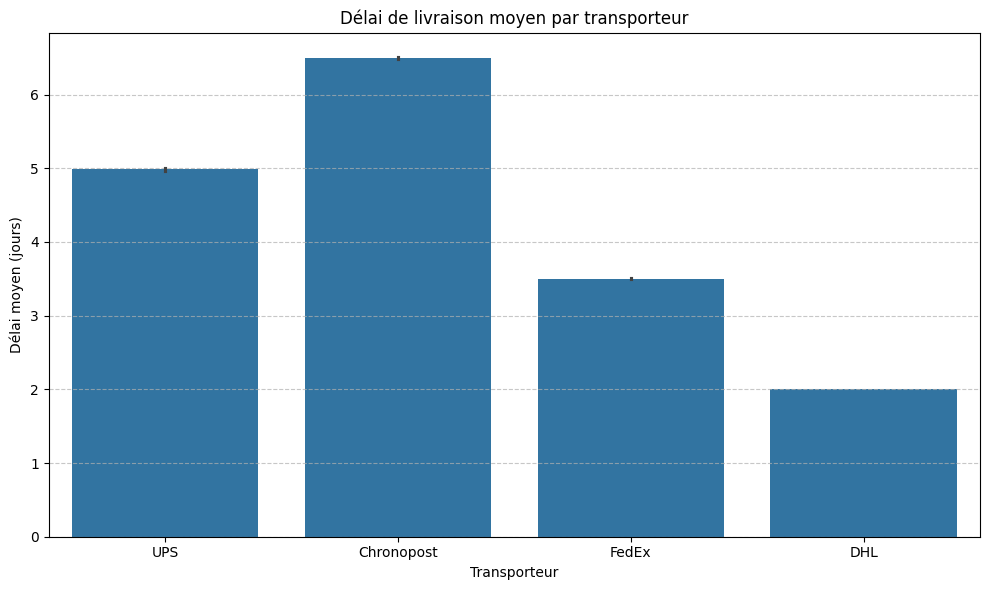

In [ ]:
data['date_expedition'] = pd.to_datetime(data['date_expedition'])
data['date_livraison'] = pd.to_datetime(data['date_livraison'])

# Extraire le mois pour l'analyse de saisonnalité
data['mois_expedition'] = data['date_expedition'].dt.month

# Analyse du volume mensuel
plt.figure(figsize=(12, 6))
monthly_counts = data['mois_expedition'].value_counts().sort_index()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Volume d\'expéditions par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'expéditions')
plt.xticks(range(0, 12), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyse des variables catégorielles
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution par transporteur
sns.countplot(data=data, y='transporteur', ax=axes[0], order=data['transporteur'].value_counts().index)
axes[0].set_title('Nombre d\'expéditions par transporteur')
axes[0].set_ylabel('Transporteur')
axes[0].set_xlabel('Nombre d\'expéditions')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Distribution par entrepôt
sns.countplot(data=data, y='entrepôt', ax=axes[1], order=data['entrepôt'].value_counts().index)
axes[1].set_title('Nombre d\'expéditions par entrepôt')
axes[1].set_ylabel('Entrepôt')
axes[1].set_xlabel('Nombre d\'expéditions')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Visualisation des relations avec des nuages de points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='quantité', y='coût_transport', hue='transporteur', alpha=0.6)
plt.title('Relation entre quantité et coût de transport par transporteur')
plt.xlabel('Quantité')
plt.ylabel('Coût de transport (€)')
plt.grid(linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Boîte à moustaches du coût par entrepôt et transporteur
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='entrepôt', y='coût_transport', hue='transporteur')
plt.title('Coût de transport par entrepôt et transporteur')
plt.xlabel('Entrepôt')
plt.ylabel('Coût de transport (€)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyse du délai de livraison moyen par transporteur
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='transporteur', y='délai_livraison')
plt.title('Délai de livraison moyen par transporteur')
plt.xlabel('Transporteur')
plt.ylabel('Délai moyen (jours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusions de l'Analyse Exploratoire des Données

## Caractéristiques du jeu de données
- Le dataset contient 42,404 expéditions avec 11 colonnes incluant des informations sur les commandes, produits, quantités, dates et coûts.
- Aucune valeur manquante n'a été détectée dans le jeu de données.

## Principales observations

### Distribution des variables
- Les quantités commandées varient de 1 à 20 articles, avec une distribution décroissante (plus de petites commandes).
- Les coûts de transport se situent approximativement entre 10€ et 25€.
- Les délais de livraison varient de 2 à 7 jours, avec une majorité à 4 jours (12,512 expéditions).

### Corrélations
- Corrélation positive modérée (0.64) entre la quantité et le coût de transport.
- Corrélation négative faible (-0.35) entre le coût de transport et le délai de livraison.
- Pas de corrélation significative entre la quantité et le délai de livraison.

### Saisonnalité
- Forte activité en fin d'année, avec un pic en décembre (10,158 expéditions).
- Activité plus faible pendant l'été (juin-juillet).

### Analyse par transporteur et entrepôt
- FedEx est le transporteur le plus utilisé, suivi par UPS.
- Les entrepôts sont tous autant actifs.
- Les délais de livraison varient selon le transporteur, certains étant plus rapides que d'autres.
- Les coûts de transport ne diffèrent pas (étonnament) selon la combinaison entrepôt-transporteur.

### Valeurs aberrantes
- Quelques outliers identifiés dans les quantités et délais de livraison, mais ils ne sont pas considérés comme aberrants et ont été conservés pour l'analyse.

## Implications pour l'analyse prédictive
- Le modèle prédictif pourrait exploiter la corrélation entre quantité et coût de transport.
- La saisonnalité devrait être prise en compte pour les prévisions de volume.
- Les variables catégorielles (transporteur, entrepôt) semblent influencer les coûts et délais.